# TITLE: Student Performance Prediction (Regression)

__1-import required libraries__

In [1]:
# read file
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


 __2-Load datasets__

In [2]:
df=pd.read_csv("Student_Performance.csv")
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45


In [3]:
df.shape

(10000, 6)

`This datasets contain 10000 rows and 6 columns`

__3-Exploratory Data Analysis (EDA)__

> * Dataset Info & Statistics

In [4]:
df.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


>* Missing Values

In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

`Insight: There are No missing values → dataset is clean.`

In [7]:
duplicates=df.duplicated().sum()
duplicates

np.int64(127)

In [8]:
df = df.drop_duplicates()
df.shape

(9873, 6)

`Insights: There was 127 duplicates so we remove the dupicates.`

>* Distribution Plots

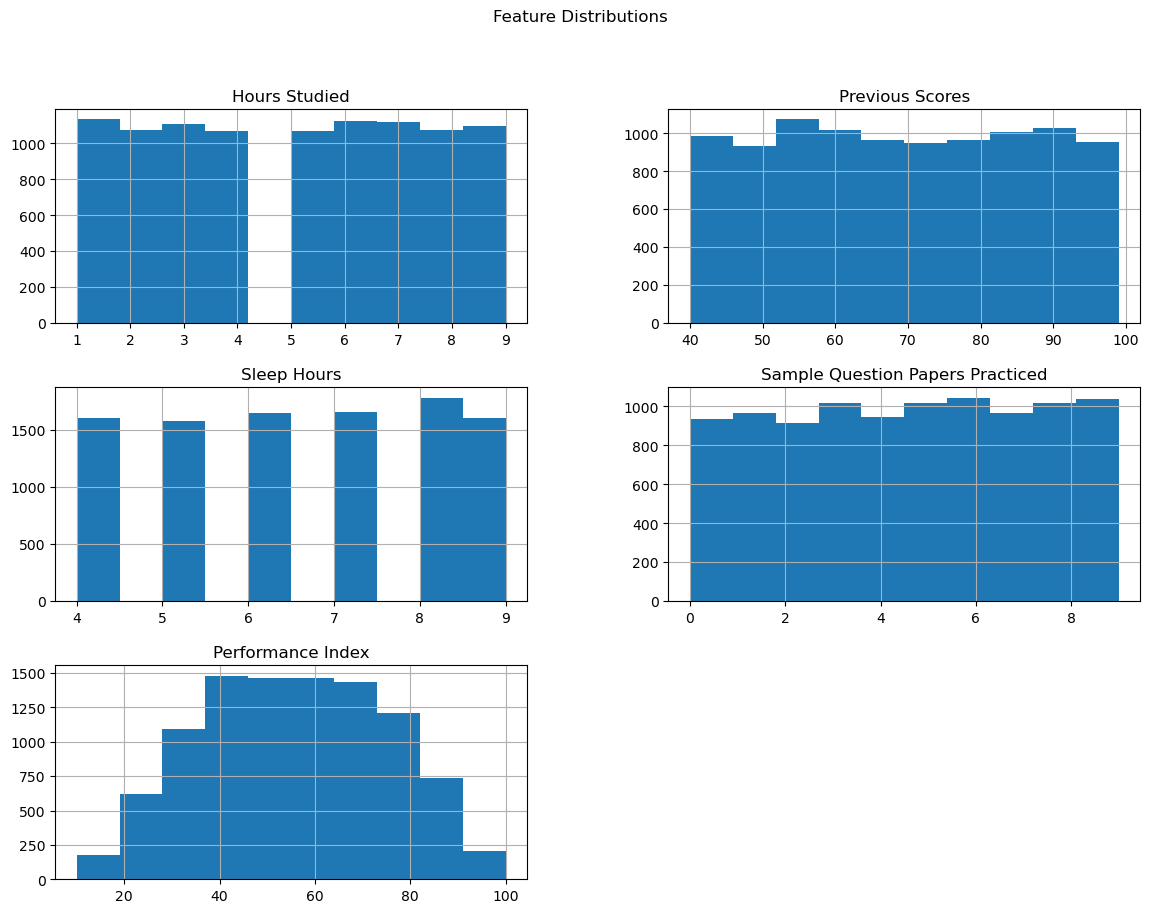

In [9]:
df.hist(figsize=(14,10))
plt.suptitle("Feature Distributions")
plt.show()

>* Box Plot(outliers)

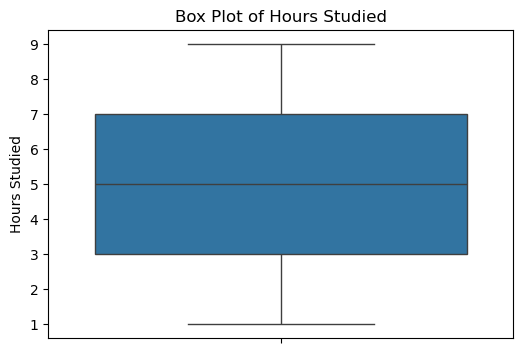

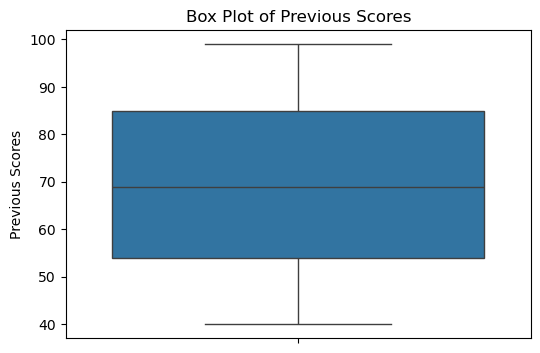

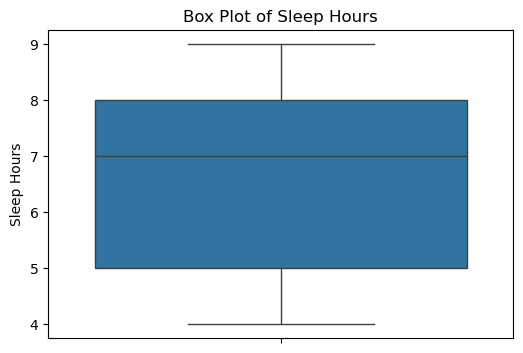

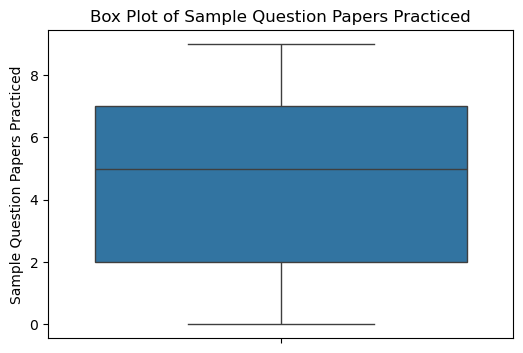

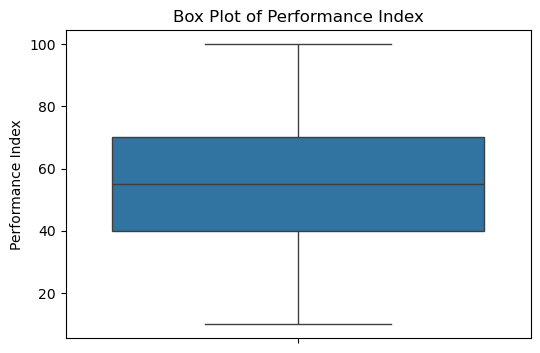

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

__* Correlation Heatmap__

In [11]:
numerical_data=df.select_dtypes(include=['int64'])

In [12]:
corr=numerical_data.corr()
print(corr)

                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.010676     0.002131   
Previous Scores                       -0.010676         1.000000     0.007975   
Sleep Hours                            0.002131         0.007975     1.000000   
Sample Question Papers Practiced       0.015740         0.008719     0.004907   
Performance Index                      0.375332         0.915135     0.050352   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.015740   
Previous Scores                                           0.008719   
Sleep Hours                                               0.004907   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043436   

                                  Performance Index  
Hours Studied                         

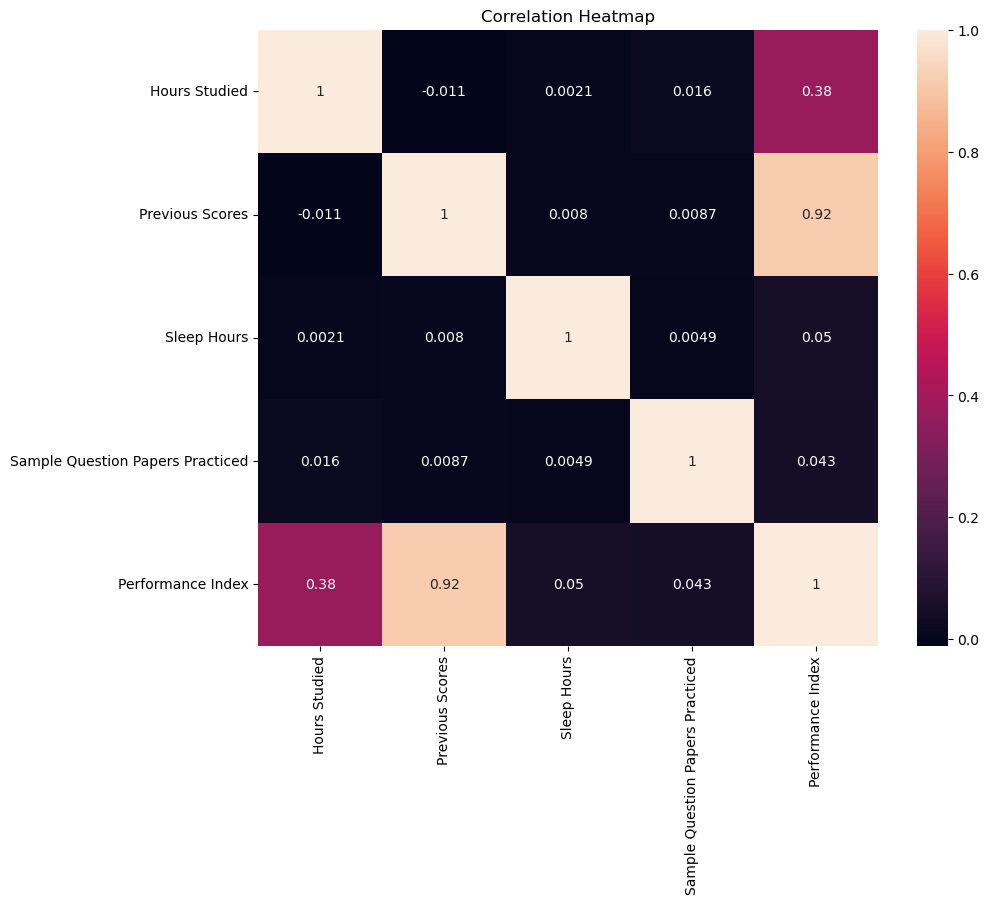

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

EDA Outcomes:

*Analyzed data distributions

*Identified outliers using box plots

*Observed feature–target correlations

*Visualized relationships using heatmaps

__Label Encoding__

In [14]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Extracurricular Activities'], dtype='object')

In [15]:
label_encoders={}
for col in categorical_columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [16]:
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65


__4-Define Target & Features__

In [17]:
target = 'Performance Index'   # match EXACT name from df.columns
X = df.drop(columns=[target])
y = df[target]


__Target variable in this datasets is performance index so we fix this column as Y(dependent variable)__

__5-Train-Test Split__

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7898, 5)
(1975, 5)
(7898,)
(1975,)


__6-Scaling__

In [20]:
scaler = StandardScaler() #zscore =(x-MU)/(Sigma)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


__7-All Regression Models__

In [21]:
models = {
    "Linear Regression": (LinearRegression(), {}),

    "Ridge Regression": (
        Ridge(),
        {"model__alpha": [0.1, 1, 10]}
    ),

    "Lasso Regression": (
        Lasso(max_iter=5000),
        {"model__alpha": [0.01, 0.1, 1]}
    ),

    "Decision Tree": (
        DecisionTreeRegressor(random_state=42),
        {
            "model__max_depth": [None, 5, 10, 20],
            "model__min_samples_split": [2, 5, 10]
        }
    ),

    "AdaBoost": (
        AdaBoostRegressor(random_state=42),
        {
            "model__n_estimators": [50, 100, 200],
            "model__learning_rate": [0.01, 0.1, 1.0]
        }
    ),

    "Elastic Net": (
        ElasticNet(max_iter=5000),
        {
            "model__alpha": [0.01, 0.1, 1],
            "model__l1_ratio": [0.2, 0.5, 0.8]
        }
    ),

    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            "model__n_estimators": [100, 200],
            "model__max_depth": [None, 10, 20]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [3, 5]
        }
    ),

    "Support Vector Machine": (
        SVR(),
        {
            "model__C": [0.1, 1, 10],
            "model__gamma": ["scale", "auto"],
            "model__kernel": ["rbf"]
        }
    ),

    "KNN Regressor": (
        KNeighborsRegressor(),
        {
            "model__n_neighbors": [3, 5, 7, 9],
            "model__weights": ["uniform", "distance"]
        }
    )
}


__8-Train, Predict & Evaluate All Models__

In [ ]:
results = []

for name, (model, params) in models.items():

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    if params:
        grid = GridSearchCV(
            pipe,
            params,
            cv=5,
            scoring='r2',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    else:
        best_model = pipe
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })


__9-Results DataFrame__

In [ ]:
results_df = pd.DataFrame(results)
results_df.sort_values("R2 Score", ascending=False)


# extracting key performance

In [27]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# ✅ Access trained RandomForest
rf = model.named_steps["regressor"]

print("Number of trees:", len(rf.estimators_))

Number of trees: 200


In [28]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))

                                 Feature  Importance
1                   num__Previous Scores    0.847008
0                     num__Hours Studied    0.141775
4  num__Sample Question Papers Practiced    0.005161
3                       num__Sleep Hours    0.004740
2        num__Extracurricular Activities    0.001316


__previous score is affect for performance index  more than others__

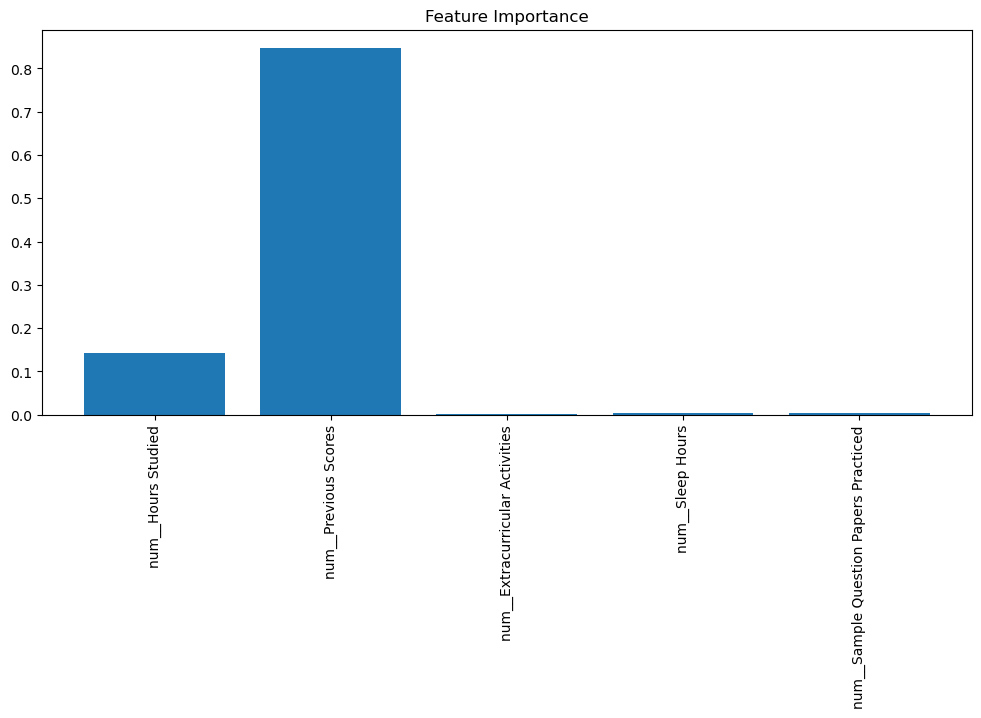

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.bar(feature_names, rf.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [30]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": pipeline.named_steps["model"].coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

                            Feature  Coefficient
1                   Previous Scores    17.619931
0                     Hours Studied     7.373316
3                       Sleep Hours     0.802138
4  Sample Question Papers Practiced     0.540053
2        Extracurricular Activities     0.286906


> Model	                              Feature Importance
1)Linear / Ridge / Lasso	            Use coefficients
> 2)Tree / RF / GB	                    Use feature_im

__10-Visualization – Model Performance__

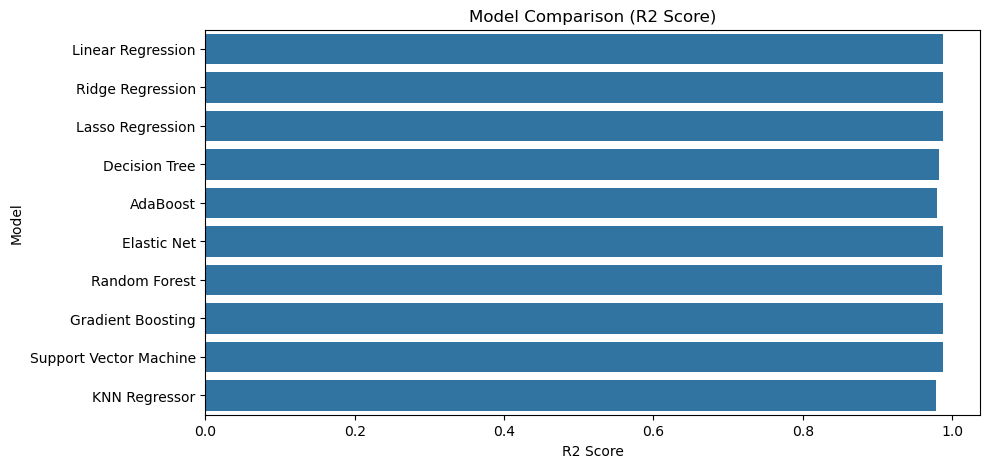

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x="R2 Score", y="Model", data=results_df)
plt.title("Model Comparison (R2 Score)")
plt.show()


__11-Best Model Selection__

In [26]:
best_model = results_df.iloc[0]
best_model

Model       Linear Regression
R2 Score              0.98843
MAE                   1.64697
RMSE                 2.075066
Name: 0, dtype: object

__linear regression model is best for student performance prediction__

__12- predict the performance index by manually__

In [33]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model =LinearRegression()

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", model)
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


# MANUAL INPUT 

print("\nEnter Student Details:")

user_input = {
    col: input(f"{col}: ") for col in X.columns
}

manual_df = pd.DataFrame([user_input])

# Convert numeric columns
for col in numerical_cols:
    manual_df[col] = manual_df[col].astype(float)

prediction = pipeline.predict(manual_df)

print("\nPredicted Performance Index:", round(prediction[0], 2))

Categorical Columns: []
Numerical Columns: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
R2 Score: 0.9884301209927054

Enter Student Details:


Hours Studied:  8
Previous Scores:  57
Extracurricular Activities:  1
Sleep Hours:  8
Sample Question Papers Practiced:  5



Predicted Performance Index: 52.17
